
##**01-Descrevendo o Problema de Negócio**

A **LOG.SOLUTIONS** atua no setor de varejo, comercializando diversos produtos em várias lojas em todo o Brasil. A empresa deseja implementar um **Data Warehouse (DW)** para apoiar suas decisões de negócios. **O foco será na área de logística, que tem apresentado custos elevados nas entregas dos produtos.**

A empresa colabora com diversas transportadoras que são responsáveis por coletar produtos em diversos depósitos da empresa e realizar entregas aos clientes. Cada entrega varia de acordo com o produto e o local de entrega.

A Organização está buscando maneiras de compreender como reduzir os custos de frete. Além disso, a empresa deseja comparar o tempo necessário para cada transportadora concluir uma entrega. Isso envolve medir a diferença entre a data de coleta do produto nos depósitos da empresa e a data de entrega ao cliente. Quando a transportadora coleta o produto e registra a documentação, esse processo é iniciado. A partir desse momento, o prazo começa a contar até que o produto seja entregue ao cliente e assinado como recebido. Nesse ponto, considera-se que o processo de entrega está concluído.

A **LOG.SOLUTIONS** precisa medir essa diferença, pois será solicitado um relatório que forneça essas informações. O cliente paga pelo frete em compras acima de 100 reais, mas independentemente disso, cada transportadora recebe pagamento pelo seu serviço. A empresa mantém registros dos clientes das transportadoras, dos depósitos,  parceiros de entregas, dos custos de frete e do desempenho das transportadoras.

----

##**02- Modelando o Data Warehouse**

As dimensões encontradas no problema de negócio:

**Dimensão Cliente:** Assume um papel central nesse contexto, uma vez que é o destinatário dos produtos. Além disso, as condições de pagamento do frete estão diretamente relacionadas ao valor da compra, e é o cliente quem valida a entrega. Por essas razões, a inclusão da dimensão Cliente se mostra essencial para o sucesso desse modelo.

**Dimensão Transportadora:** Desempenha um papel crucial, sendo responsável por coletar os produtos nos depósitos da empresa. É importante ressaltar que a LOG.SOLUTIONS dispõe de informações detalhadas sobre as transportadoras, e cada uma delas pode adotar diferentes métodos de entrega, como o uso de caminhões ou serviços terceirizados. Vale destacar que o tipo de transporte escolhido também impacta diretamente nos custos associados, tornando essa dimensão de extrema relevância para o modelo em questão.

**Dimensão Produto:** É essencial, uma vez que o tipo de produto tem uma influência direta no cálculo do preço do frete. Produtos de maior dimensão podem demandar métodos de entrega distintos em comparação aos produtos de menor porte, o que torna esta dimensão fundamental para o entendimento e a otimização do processo logístico.

**Dimensão Tempo:** Permite a análise de datas de coleta e entrega, o cálculo dos tempos de entrega e a criação de relatórios relacionados às datas. Ela é essencial para acompanhar e otimizar o fluxo de tempo em todo o processo logístico.

**Dimensão Depósito:** Possui um papel crítico no processo de entrega, exercendo influência significativa sobre a logística. Ela desempenha um papel fundamental ao afetar diversos aspectos da cadeia de suprimentos e da distribuição de produtos.

**Dimensão Entrega:** Fundamental para monitorar a eficácia das entregas e a satisfação do cliente. Ela habilita a criação de relatórios específicos, proporcionando insights valiosos para compreender a ocorrência de atrasos nas entregas e outros problemas relacionados ao processo de entrega.

**Dimensão Pagamento:** Registra os pagamentos de frete, tornando-se um elemento essencial para análises financeiras. Embora algumas medidas possam estar na tabela de fatos, esta dimensão oferece os atributos necessários para a elaboração de relatórios financeiros de relevância.

---


##**03 - Resultado da Moddelagem**
###**Modelo Star Schema**



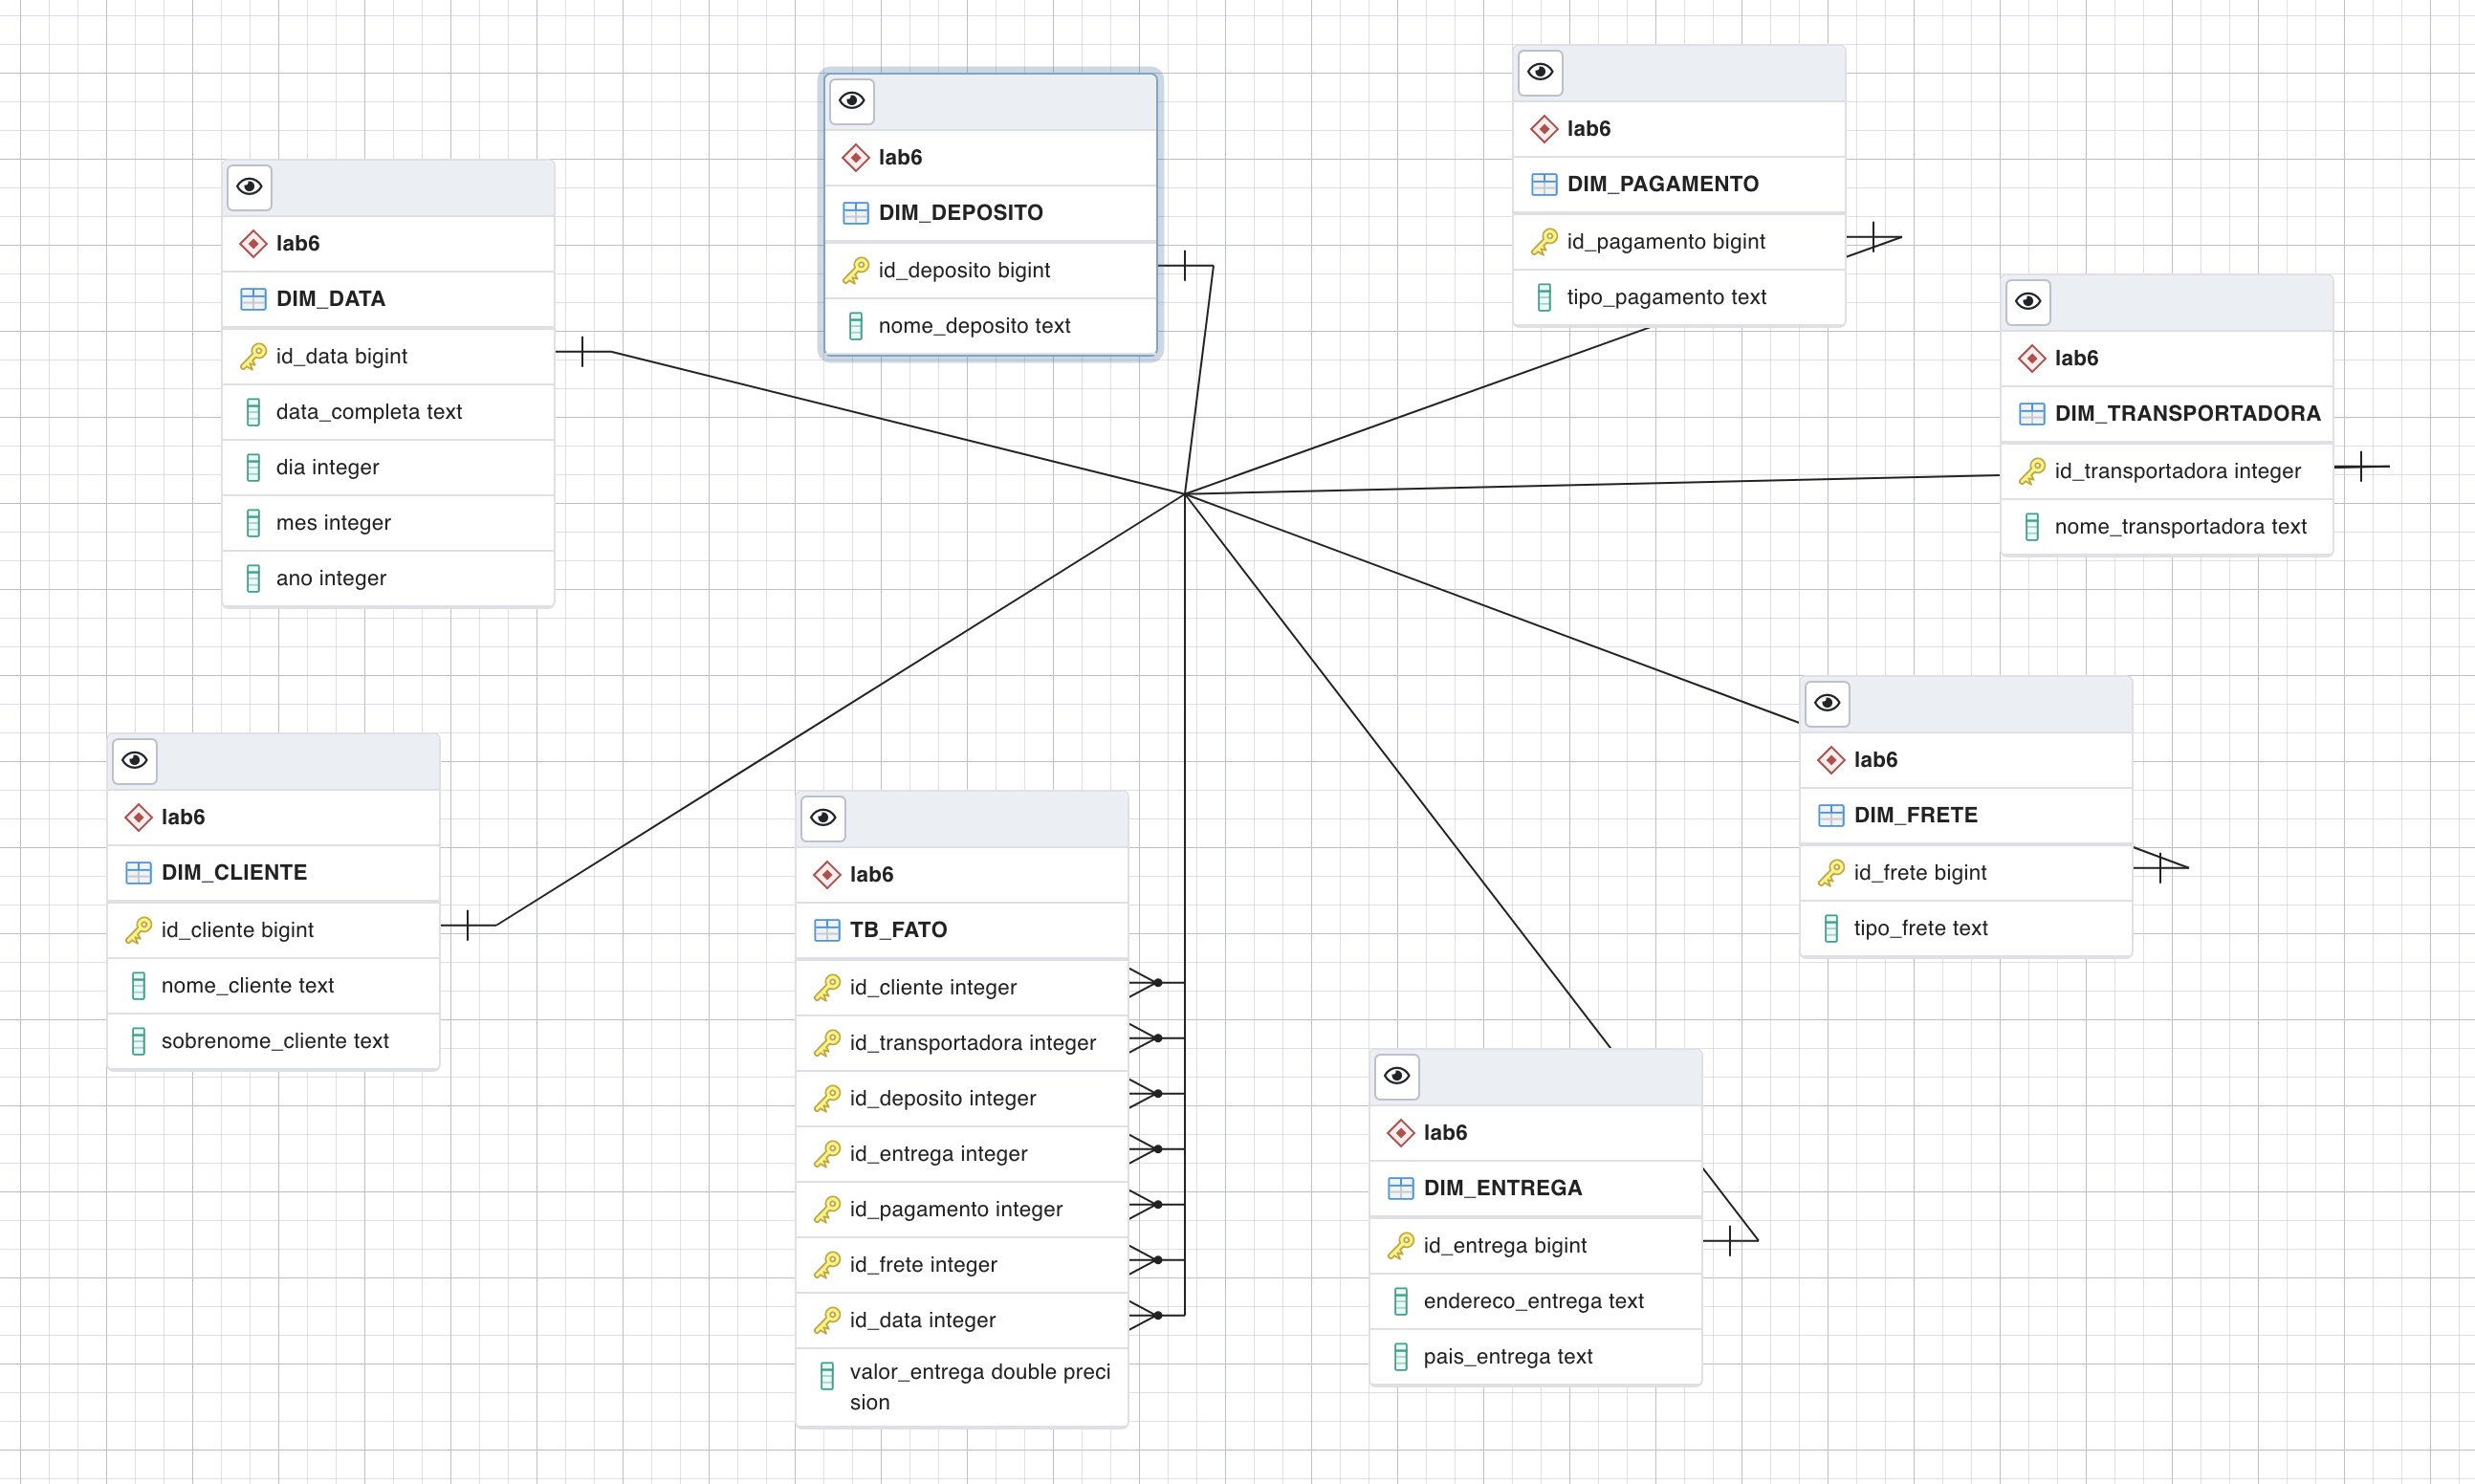

---

##**04 - Instalando o Docker**

As informações e detalhadas sobre como instalar o Docker foram encintradas no site oficial do Docker:

https://docs.docker.com/get-docker/

Nesse link, encontramos instruções para instalar o Docker em diferentes sistemas operacionais, como **Windows**, **macOS** e **Linux**.

##**05- Banco de Dados**


###**5.1 Criação do Banco de dados**

Foi criado um container Docker com um banco de dados PostgreSQL, configurado com um nome de usuário, além de ter sido mapeada a porta XXXX no host para a porta YYYY no contêiner para permitir conexões ao banco de dados. O contêiner foi nomeado como "logística" para facilitar a referência futura.

```
# Modelo do código do container com a imagem do Postgres

docker run --name “nome do container” -p xxxx:yyyy -e POSTGRES_USER=nome do usuario
-e POSTGRES_PASSWORD=senha -e POSTGRES_DB=nome do banco de addoss -d postgres


```


Foram utilizados os links abaixo para copiar o comando para uso da imagem do PostgreSQL e seguir os passos para a criação e customização de containers.

* https://www.docker.com

* https://hub.docker.com/_/postgres


Foram utilizados os links abaixo para downloads do pgadmim.

* https://www.postgresql.org/
* https://www.pgadmin.org/

Processo executado via linha de comando no linux

###**5.2- Criando a conexão do Banco de Dados do Pgadmim com o container**

Para Estabelecer esse conexão seguiu os seguintes passoas;;

01- Dentro do Pgadmim, clicar com o botão direito em **Server/Register/Server**


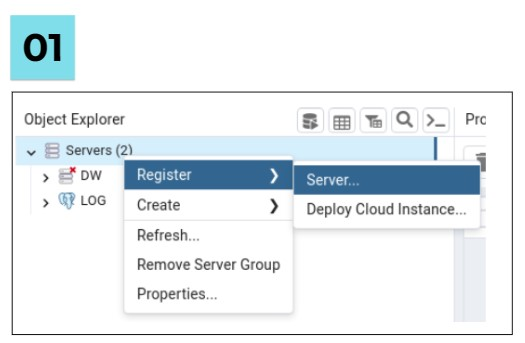


**02 e 03 - Configurar o Register/Server/General e Connection**

**Register server/General** colocar:
* Nome para o servidor

**Register server/Connection**, colocar:
* local host;
* Porta:
* Nome do Banco de Dados;
* Nome do usúario;
* Senha

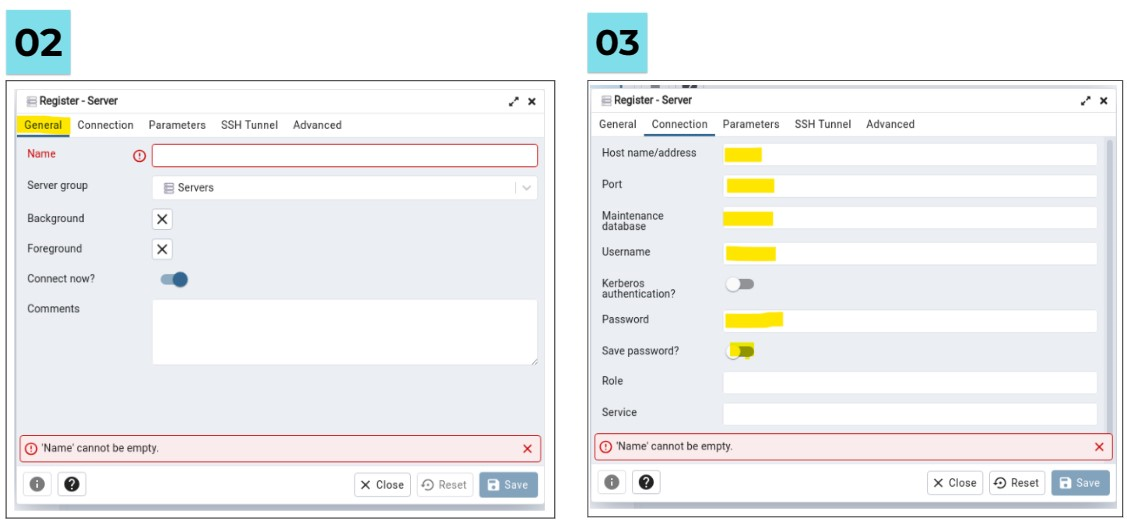

**04 e 05 - Criar o Schema e as tabelas**\

Após as etapas 03 e 04, foi criado o banco de dados logsolutions, dentro o schema chamado **"varejo"** e foram criadas as tabelas

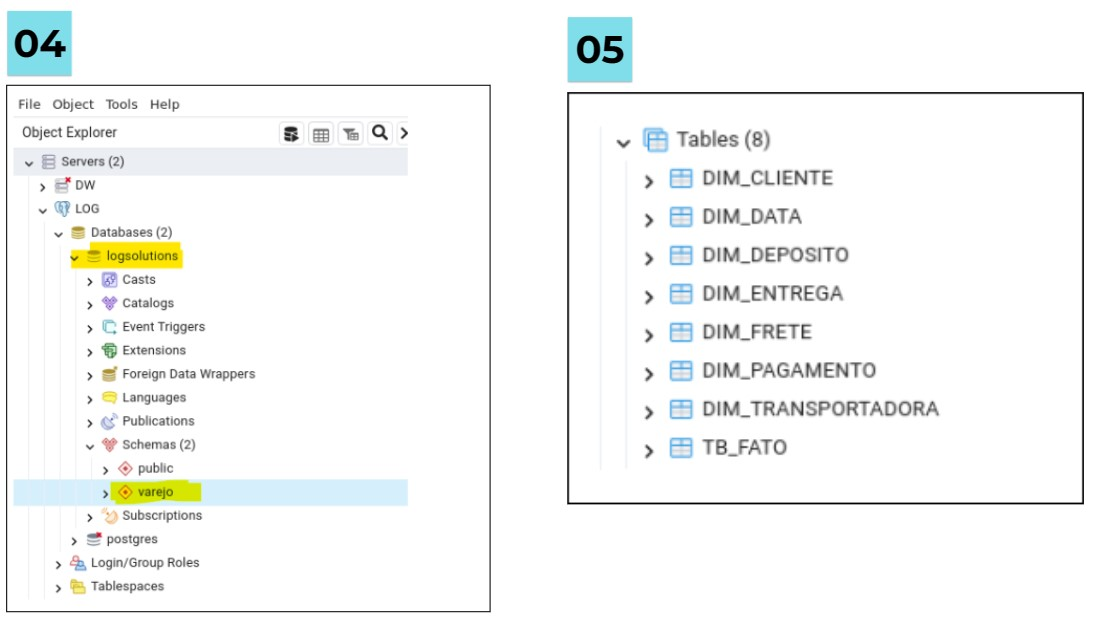





###**5.3- Códigos para criação da tabela Fato e Tabelas Dimensões**

```
# 01- Criar tabela "DIM_CLIENTE"

CREATE TABLE lab6.DIM_CLIENTE
(
    id_cliente int NOT NULL,
    nome_cliente text,
    sobrenome_cliente text,
    PRIMARY KEY (id_cliente)
);

```
```
# 02-  Criar tabela "DIM_TRANSPORTADORA"

CREATE TABLE varejo."DIM_TRANSPORTADORA"
(
    id_transportadora integer NOT NULL,
    nome_transportadora text,
    PRIMARY KEY (id_transportadora)
);

```
```
# 03-  Criar tabela "DIM_DEPOSITO"

CREATE TABLE varejo."DIM_DEPOSITO"
(
    id_deposito bigint NOT NULL,
    nome_deposito text,
    PRIMARY KEY (id_deposito)
);

```
```
# 04-  Criar tabela "DIM_ENTREGA"

REATE TABLE varejo."DIM_ENTREGA"
(
    id_entrega bigint NOT NULL,
    endereco_entrega text,
    pais_entrega text,
    PRIMARY KEY (id_entrega)
);

```
```
# 05-  Criar tabela "DIM_PAGAMENTO"

RCREATE TABLE varejo."DIM_PAGAMENTO"
(
    id_pagamento bigint NOT NULL,
    tipo_pagamento text,
    PRIMARY KEY (id_pagamento)
);

```
```
# 06-  Criar tabela "DIM_FRETE"

CREATE TABLE varejo."DIM_FRETE"
(
    id_frete bigint NOT NULL,
    tipo_frete text,
    PRIMARY KEY (id_frete)
);

```
```
# 07-  Criar tabela "DIM_DATA"

CREATE TABLE varejo."DIM_DATA"
(
    id_data bigint NOT NULL,
    data_completa text,
    dia integer,
    mes integer,
    ano integer,
    PRIMARY KEY (id_data)
);
```
```
# 08-  Criar tabela "TB_FATO"

CREATE TABLE varejo."TB_FATO"
(
    id_cliente integer,
    id_transportadora integer,
    id_deposito integer,
    id_entrega integer,
    id_pagamento integer,
    id_frete integer,
    id_data integer,
    valor_entrega double precision,
    PRIMARY KEY (id_cliente, id_transportadora,
    id_deposito, id_entrega, id_pagamento, id_frete, id_data)
);
```




##**06- Instalando o Anaconda Python**

Para Realizar o downloads do Anaconda Python foi seguida a documentação oficial:

https://www.anaconda.com/download#downloads

* Baixado o arquivo para uma pasta de acordo com seu sistema operacional;

* Descompactado o arquivo no terminal linux com o comando abaixo.

```
# bash Anaconda3-2023.07-2-Linux-x86_64.sh
```
* seguir os passos que o sistema informa.



##**07- Instalação do Apache Airflow**


O Apache Airflow foi instalado via docker;

* O primeiro passo foi criar uma pasta chamada "airflow" dentro do diretório principal.

```
/ home/mvslopes/airflow

```
* Após criar a estrutura de pastas que receberá o Apache Airflow, foi realizada a consulta à documentação oficial em:

https://airflow.apache.org/docs/apache-airflow/stable/howto/docker-compose/index.html

* Seguindo a documentação para realizar o download do Apache Airflow via Docker, o primeiro comando que executamos no sistema Linux foi:

```
curl -LfO 'https://airflow.apache.org/docs/apache-airflow/2.7.1/docker-compose.yaml'

```
Este comando contém os detalhes para a criação dos contêineres, que serão oito. Deve ser executado dentro da pasta que foi criada:\
**/ home/mvslopes/airflow**  para realizar o downloads.


**01-** Seguindo a Documentação do Airflow, é necessário criar três pastas:\
**Comando #01**

**dags:** Esta pasta é usada para armazenar as DAGs (Directed Acyclic Graphs), que são os arquivos de definição de tarefas e fluxos de trabalho no Airflow.

**logs:** Aqui você pode armazenar os registros (logs) das execuções das tarefas e dos DAGs.

**plugins:** Esta pasta é usada para armazenar seus plugins personalizados, que podem conter operadores, sensores e ganchos personalizados para estender as funcionalidades do Airflow.


**02-** A documentação solicita que ajuste uma variável de ambiente..\
**"Comando #02"**

**03-** Inicializar o banco de dados do Airflow.\
**"Comando #03"**

**04-** Inicializar o Apache Airflow.\
**"Comando #04"**
```
#01
mkdir -p ./dags ./logs ./plugins ./config

#02
echo -e "AIRFLOW_UID=$(id -u)" > .env

#03
docker compose up airflow-init

#04
docker compose up

```


##**08- Interface do Apache Airflow**

Após a inicialização do apache Airflow com o comando:



```
docker compose up

```

Vamos iniciar a interface do Apache Airflow através do navegador digiltando:

```
Localhost:8080

```

**Teremos as Interfaces abixo**\
 **01- Solicitando loging e senha**

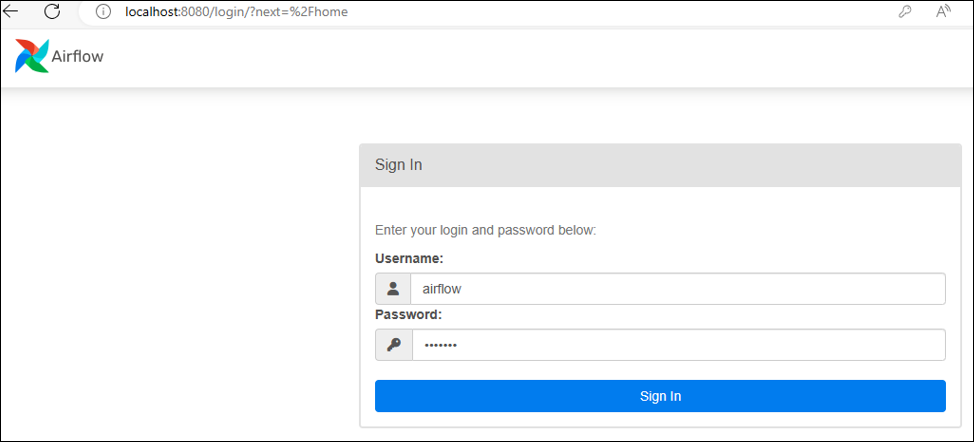

 **02- Interface Apache Airflow**

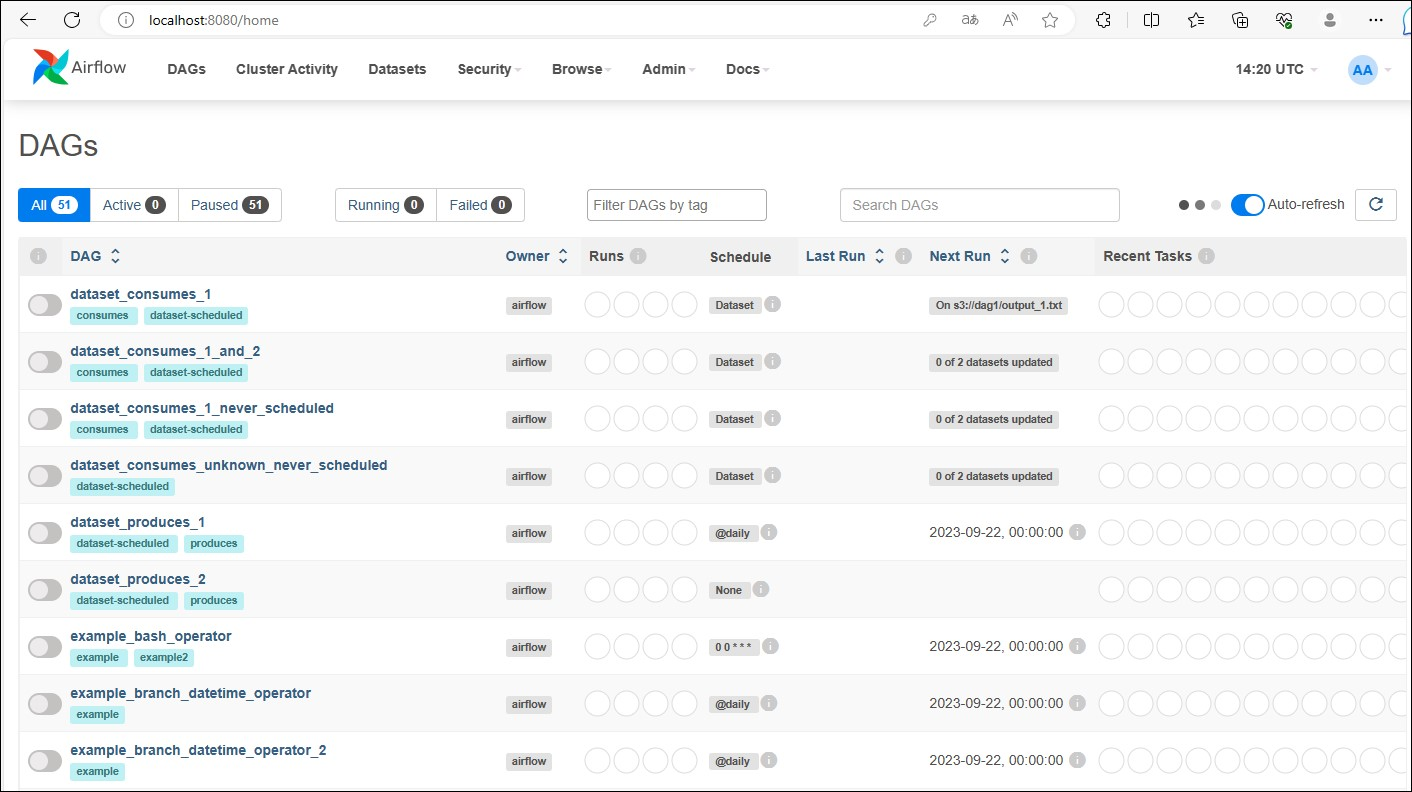



##**09- Tecnologias do Projeto**

As tecnologias usadas nesse projeto foram instaladas e configuradas:

* PostgreSQL e PGadmin;
* Docker;
* Anaconda Python;
* Apache Airflow